# Mall Customer Analysis

## Project Overview
**Objective:** Segment mall customers into distinct groups based on annual income and spending behaviour.
**Business impact:** Helps businesses tailor marketing campaigns to specific customer groups.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
cust_data = pd.read_csv('Mall_Customers.csv')

cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
cust_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
cust_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


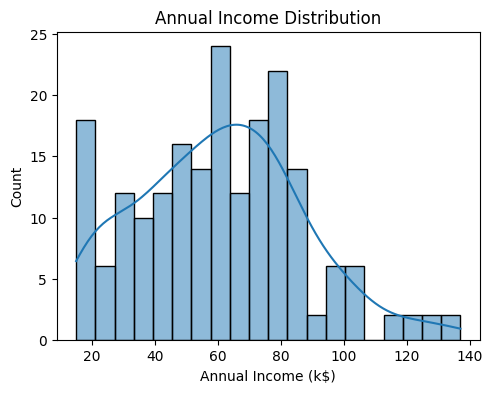

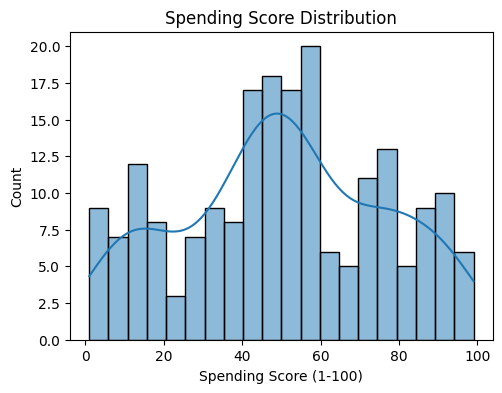

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(cust_data['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
sns.histplot(cust_data['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.show()

In [12]:
#Feature selection
X = cust_data[['Annual Income (k$)', 'Spending Score (1-100)']]


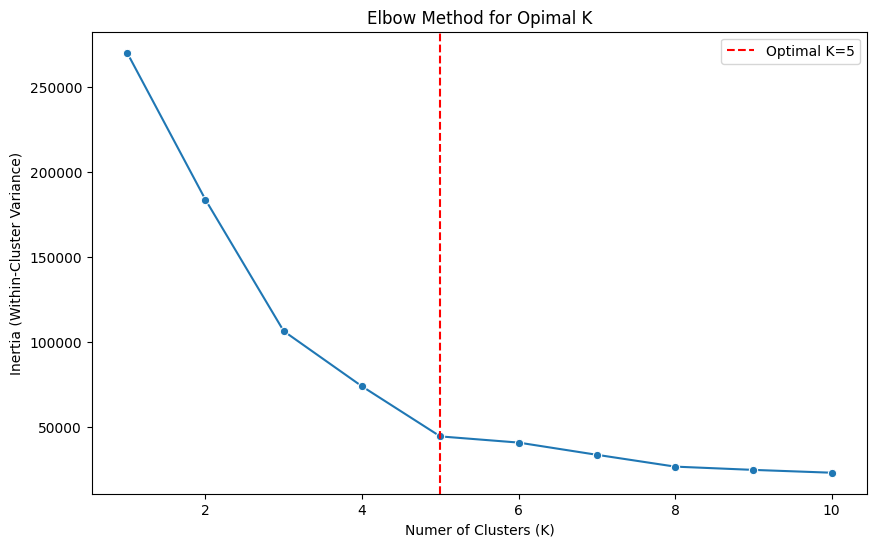

In [13]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=inertia, marker='o')
plt.title('Elbow Method for Opimal K')
plt.xlabel('Numer of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Variance)')
plt.axvline(5, linestyle='--', color='red', label='Optimal K=5')
plt.legend()
plt.show()